In [2]:
import gym
import numpy as np
import pandas as pd
from mdptoolbox import mdp, example
from matplotlib import pyplot as plt

In [48]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)
env.reset()
#env.render()

(0, {'prob': 1})

In [63]:
0.9995**10000

0.006729527022146667

In [131]:
class QLearningAgent(object):
    def __init__(self, env, alpha = 1, gamma = 0.9, eps = 1.0
                 , eps_decay = 0.9999, min_eps = 0.1, max_step = 10001
                , method = 'random', adaptive_alpha = True):
        self.Q = None
        self.alpha = 1
        self.gamma = 0.9
        self.env = env
        self.eps = eps
        self.max_step = max_step
        self.min_eps = min_eps
        self.eps_decay = eps_decay
        self.method = method
        self.adaptive_alpha = adaptive_alpha
    def act(self, s):
        if self.method == 'random':
            return self.env.action_space.sample()
        elif self.method == 'eps_greedy':
            tmp = np.random.rand()
            #print(tmp)
            if tmp <= self.eps:
                return self.env.action_space.sample()
            else:
                #print('best')
                return self.Q[s].argmax()
        elif self.method == 'best':
            return self.Q[s].argmax()

    def solve(self, optimal_agent = None):
        """Create the Q table"""
        self.Q = np.zeros((self.env.observation_space.n, self.env.action_space.n))

        for i in range(self.max_step):
            if optimal_agent and i%1000==0:
                print(i, self.policy_err(optimal_agent), self.v_err(optimal_agent))
                
            cur_state = self.env.reset()[0]
            done = False
            while not done:
                cur_action = self.act(cur_state)
                next_state, reward, done, _, _ = self.env.step(cur_action)
                if reward == 1:
                    next_q = 0
                else:
                    next_q = max(self.Q[next_state])
                self.Q[cur_state][cur_action] += self.alpha * (reward + self.gamma * next_q - self.Q[cur_state][cur_action]) 
                cur_state = next_state
            self.eps = max(self.eps*self.eps_decay, self.min_eps)
            if self.adaptive_alpha:
                self.alpha = max(self.alpha*0.999, self.min_eps)
    def Q_table(self, state, action):
        """return the optimal value for State-Action pair in the Q Table"""
        return self.Q[state][action]
    
    def policy_err(self, optimal_agent):
        cur_policy = self.Q.argmax(axis=1)
        return sum(cur_policy != optimal_agent.policy)
    def v_err(self, optimal_agent):
        return np.linalg.norm(self.Q.max(axis=1) - optimal_agent.V,ord = np.inf ),np.linalg.norm(self.Q.max(axis=1) - optimal_agent.V,ord = 2 )

In [125]:
q_agent = QLearningAgent(env,method = 'random',adaptive_alpha = False)
q_agent.solve(vi)

0 44 (0.6303669449960765, 1.0765673331896086)
1000 36 (0.5474999148444993, 2.253643940833796)
2000 37 (0.6203999148444993, 2.5238240335241686)
3000 31 (0.6203999148444993, 2.6460368614076)
4000 39 (0.6943847447658849, 2.8172342718100705)
5000 37 (0.6943847447658849, 2.6990953022224238)
6000 42 (0.6133847447658849, 2.5221825960809383)
7000 40 (0.6133847447658849, 2.4744331367756462)
8000 39 (0.6133847447658849, 2.7764943064490835)
9000 35 (0.5932679422947471, 2.543822364479497)
10000 37 (0.6203999148444993, 2.9185471260671414)


In [134]:
q_agent = QLearningAgent(env,method = 'random')
q_agent.solve(vi)

0 44 (0.6303669449960765, 1.0765673331896086)
1000 31 (0.6144391742560652, 1.4923415283751948)
2000 21 (0.6144391742560652, 1.065795367990162)
3000 20 (0.6144391742560652, 0.9665278144318091)
4000 18 (0.6144391742560652, 0.8756449087972954)
5000 22 (0.6144391742560652, 0.8292980958970745)
6000 20 (0.6140650993842712, 0.7872173710760529)
7000 18 (0.6140650993842712, 0.7702471777170175)
8000 23 (0.6140650993842712, 0.7431889181886694)
9000 20 (0.6140650993842712, 0.7375509735533935)
10000 23 (0.6140650993842712, 0.7329001143636553)


In [135]:
q_agent = QLearningAgent(env,method = 'eps_greedy', max_step = 10001)
q_agent.solve(vi)

0 44 (0.6303669449960765, 1.0765673331896086)
1000 44 (0.6144391742560652, 0.9083289699449772)
2000 42 (0.6144391742560652, 0.9054213395283273)
3000 22 (0.6144391742560652, 0.8320366099941712)
4000 22 (0.5144391742560652, 0.7246206776461348)
5000 16 (0.5144391742560652, 0.6432605960973484)
6000 18 (0.34424917425606516, 0.5222920787286404)
7000 19 (0.34424917425606516, 0.48829227891773663)
8000 18 (0.37369988425606515, 0.5430571739024995)
9000 18 (0.37369988425606515, 0.5362482831038677)
10000 18 (0.36304456080002423, 0.4634738968628642)


In [136]:
q_agent = QLearningAgent(env,method = 'eps_greedy', max_step = 100001)
q_agent.solve(vi)

0 44 (0.6303669449960765, 1.0765673331896086)
1000 44 (0.6303669449960765, 0.9136771327111134)
2000 29 (0.32258043322628666, 0.5978225202658892)
3000 20 (0.32257659740218386, 0.4685046502441614)
4000 23 (0.32257659740218386, 0.44688774441158896)
5000 20 (0.2982328498651216, 0.45249261751159364)
6000 20 (0.2982328498651216, 0.46811206845774844)
7000 19 (0.2982328498651216, 0.4593447466901139)
8000 22 (0.30292476377506733, 0.41693841541809884)
9000 17 (0.30292476377506733, 0.41789899002520076)
10000 17 (0.22040473254826287, 0.3651478003932621)
11000 15 (0.13824869806558907, 0.21913419752532073)
12000 17 (0.2104331128110622, 0.2982961748950137)
13000 15 (0.1724886458712095, 0.31542403782897216)
14000 20 (0.24013472072697317, 0.3517700696005993)
15000 22 (0.34032917505778265, 0.4109282775100517)
16000 18 (0.18221347093802032, 0.3195009482525296)
17000 19 (0.42072977373200043, 0.4633408982258721)
18000 15 (0.18114941659215622, 0.24038507845213367)
19000 17 (0.2570214454584439, 0.33111429427

KeyboardInterrupt: 

In [4]:
def create_P(env):
    num_state = env.observation_space.n
    num_act = env.action_space.n
    P = np.zeros((num_act, num_state, num_state))
    R = np.zeros((num_act, num_state, num_state))
    m = env.unwrapped.P
    
    for s, sv in m.items():
        for a, results in sv.items():
            for result in results:
                p, next_s, r, _ = result
                P[a][s][next_s] += p
                R[a][s][next_s] += r
    return P, R
P, R = create_P(env)

In [120]:
vi = mdp.ValueIteration(P, R, 0.9, max_iter=10000, epsilon = 0.001)
vi.setVerbose()
a = vi.run()
vi_policy = vi.policy

  Iteration		V-variation
    1		  0.3333333333333333
    2		  0.09999999999999999
    3		  0.06
    4		  0.04500000000000001
    5		  0.03240000000000001
    6		  0.02429999999999999
    7		  0.01846800000000004
    8		  0.01436129999999991
    9		  0.011766059999999995
    10		  0.009789011999999986
    11		  0.008223557399999998
    12		  0.006894561240000013
    13		  0.005826010536000015
    14		  0.0049379903397000074
    15		  0.004256439105330009
    16		  0.0037014091517609954
    17		  0.0031929551362043923
    18		  0.0027735508378420176
    19		  0.0024435681291478106
    20		  0.0021498053791888933
    21		  0.0018958720347630742
    22		  0.0016757925167331933
    23		  0.001495219600156708
    24		  0.001340881246915792
    25		  0.0012042711940382922
    26		  0.0010774687302392977
    27		  0.0009635626540040673
    28		  0.0008595770445929685
    29		  0.0007645141665848995
    30		  0.0006787065439361126
    31		  0.0006011865226247873
    32		  0.0005325605359475724


In [119]:
vi = mdp.PolicyIterationModified(P, R, 0.9, max_iter=1000, epsilon = 0.001)
vi.setVerbose()
vi.run()
pi_policy = vi.policy

  	Iteration		V-variation
    1		  0.3333333333333333
    2		  0.14285706693699998
    3		  0.07499999995703302
    4		  0.007145017931031283
    5		  0.0028835545993170925
    6		  0.0018304304224973332
    7		  0.0013546810751143097
    8		  0.000776736749016742
    9		  0.0001336136273529633
    10		  5.830831784554239e-05


In [137]:
res_pi = pd.read_csv('pi-frozenlake.csv')
res_vi = pd.read_csv('vi-frozenlake.csv')
res_frozen = {}
for i in range(1,4):
    res_frozen[i] = pd.read_csv('q' + str(i) + '-frozenlake.csv')


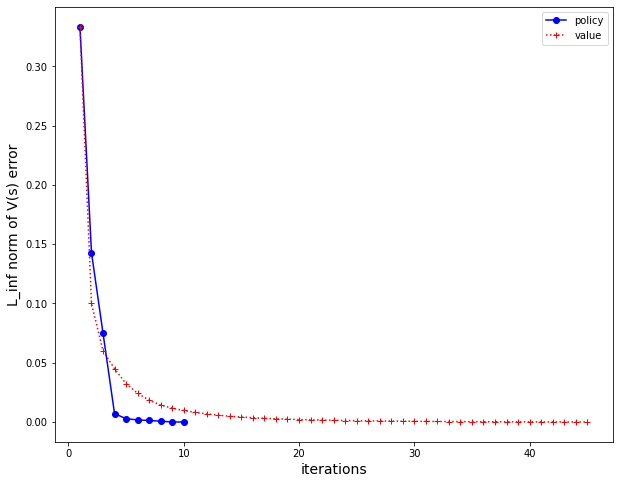

In [124]:
plt.figure(figsize=(10,8))
plt.plot(range(1,len(res_pi)+1), res_pi['V-variation'],'b-o',label='policy')
plt.plot(range(1,len(res_vi)+1), res_vi['V-variation'],'r:+',label='value')
plt.ylabel('L_inf norm of V(s) error',size=14)
plt.xlabel('iterations',size=14)
plt.legend()
plt.show()

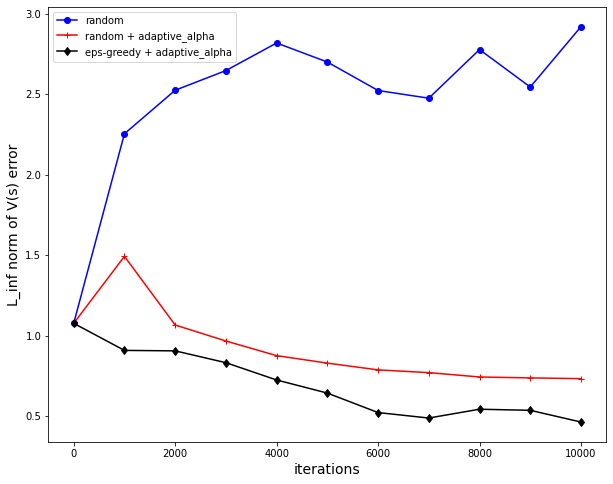

In [141]:
plt.figure(figsize=(10,8))
plt.plot(res_frozen[1]['Iteration'], res_frozen[1]['l2'],'b-o',label='random')
plt.plot(res_frozen[2]['Iteration'], res_frozen[2]['l2'],'r-+',label='random + adaptive_alpha')
plt.plot(res_frozen[3]['Iteration'], res_frozen[3]['l2'],'k-d',label='eps-greedy + adaptive_alpha')
plt.ylabel('L_2 norm of V(s) error',size=14)
plt.xlabel('iterations',size=14)
plt.legend()
plt.show()

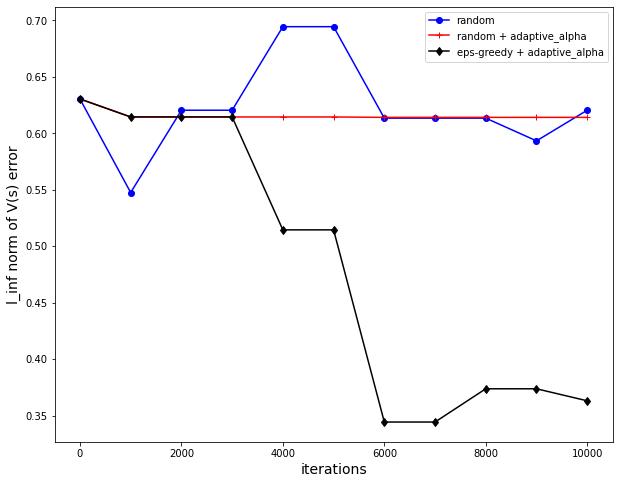

In [142]:
plt.figure(figsize=(10,8))
plt.plot(res_frozen[1]['Iteration'], res_frozen[1]['l_inf'],'b-o',label='random')
plt.plot(res_frozen[2]['Iteration'], res_frozen[2]['l_inf'],'r-+',label='random + adaptive_alpha')
plt.plot(res_frozen[3]['Iteration'], res_frozen[3]['l_inf'],'k-d',label='eps-greedy + adaptive_alpha')
plt.ylabel('l_inf norm of V(s) error',size=14)
plt.xlabel('iterations',size=14)
plt.legend()
plt.show()

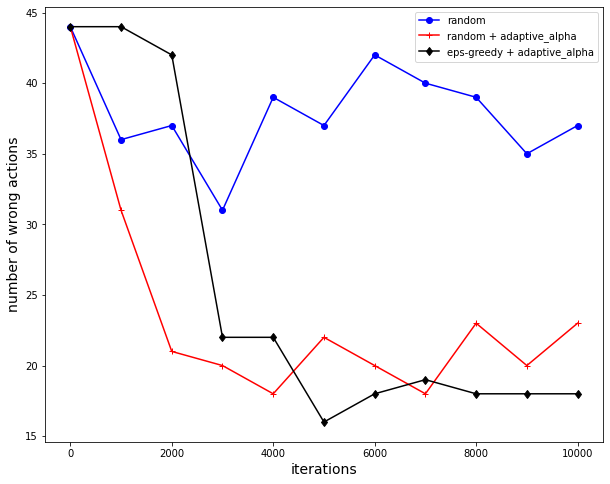

In [143]:
plt.figure(figsize=(10,8))
plt.plot(res_frozen[1]['Iteration'], res_frozen[1]['act_diff'],'b-o',label='random')
plt.plot(res_frozen[2]['Iteration'], res_frozen[2]['act_diff'],'r-+',label='random + adaptive_alpha')
plt.plot(res_frozen[3]['Iteration'], res_frozen[3]['act_diff'],'k-d',label='eps-greedy + adaptive_alpha')
plt.ylabel('number of wrong actions',size=14)
plt.xlabel('iterations',size=14)
plt.legend()
plt.show()